In [1]:
import os 
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandasql import sqldf
import numpy as np
import nltk
import re
from wordcloud import WordCloud

In [2]:
nodes = pd.read_csv('/home/manoj/tuhh/data_science_3rd_sem/deep_learning_for_social_analytics/project/deep-learning-for-social-analytics-project/cleaned_datasets/nodes.csv')
edges = pd.read_csv('/home/manoj/tuhh/data_science_3rd_sem/deep_learning_for_social_analytics/project/deep-learning-for-social-analytics-project/cleaned_datasets/edges.csv')

In [3]:
edges.head(10)

,id_0,id_1
0,76M2Ekj8bG8W7X2nbx2CpF,7sfl4Xt5KmfyDs2T3SVSMK
1,0hk4xVujcyOr6USD95wcWb,7Do8se3ZoaVqUt3woqqSrD
2,38jpuy3yt3QIxQ8Fn1HTeJ,4csQIMQm6vI2A2SCVDuM2z
3,6PvcxssrQ0QaJVaBWHD07l,6UCQYrcJ6wab6gnQ89OJFh
4,2R1QrQqWuw3IjoP5dXRFjt,4mk1ScvOUkuQzzCZpT6bc0
5,0k70gnDBLPirCltbTzoxuM,5FK3qokBQYxr7ZLkr8GVFn
6,1bAftSH8umNcGZ0uyV7LMg,1vqR17Iv8VFdzure1TAXEq
7,21ey6s5hEcTcVKDrF5MWby,7uMh23xWiuR7zsNkuNcm2G
8,1mYsTxnqsietFxj1OgoGbG,7snhzmuew8iLEDxMIhOU1P
9,3GBBxBdoolb0B5YizZq9bF,3yayE6rrovGcNkMManKwVf


In [4]:
edges.dtypes

id_0    object
id_1    object
dtype: object

In [5]:

#mapping of spotify_id to artist name
spotify_to_artist = dict(zip(nodes['spotify_id'], nodes['name']))

def get_artist_name(spotify_id):
    return spotify_to_artist.get(spotify_id, None)

# Create artist_0 and artist_1 columns
edges['artist_0'] = edges['id_0'].apply(get_artist_name)
edges['artist_1'] = edges['id_1'].apply(get_artist_name)

# Show the resulting DataFrame
print(edges)

                          id_0                    id_1  \
0       76M2Ekj8bG8W7X2nbx2CpF  7sfl4Xt5KmfyDs2T3SVSMK   
1       0hk4xVujcyOr6USD95wcWb  7Do8se3ZoaVqUt3woqqSrD   
2       38jpuy3yt3QIxQ8Fn1HTeJ  4csQIMQm6vI2A2SCVDuM2z   
3       6PvcxssrQ0QaJVaBWHD07l  6UCQYrcJ6wab6gnQ89OJFh   
4       2R1QrQqWuw3IjoP5dXRFjt  4mk1ScvOUkuQzzCZpT6bc0   
...                        ...                     ...   
300381  0PK0Dx3s9et0Uf4XbdFpiW  6SmpksRq3jxeDZ7roKDb6F   
300382  5hqRsNHDZH1jHzI9LgxFRZ  7KYseTkErcYMRvcIqacxUq   
300383  0wjb0t7aYMuIwyuXnPOilh  2p1fiYHYiXz9qi0JJyxBzN   
300384  3ciRvbBIVz9fBoPbtSYq4x  5einkgXXrjhfYCyac1FANB   
300385  25uiPmTg16RbhZWAqwLBy5  3Xt3RrJMFv5SZkCfUE8C1J   

                            artist_0      artist_1  
0                            NGHTMRE       Lil Jon  
1                          Sick Luke       MACHETE  
2                            Mat.Joe  Hayden James  
3                           Lp2loose    Headie One  
4                    Marlon Roudette  

In [6]:
edges.isnull().sum()

id_0         0
id_1         0
artist_0    27
artist_1    37
dtype: int64

In [7]:
null_rows = edges[edges['artist_0'].isnull() | edges['artist_1'].isnull()]

# Display rows with nulls
print(null_rows.head(10))

                         id_0                    id_1        artist_0  \
4708   4oPYazJJ1o4rWBrTw9lm40  7dNIRCWywqv5vRd1PbWjRc             NaN   
7186   0Dd8AchLVLMRRwSgdOC8GA  4oPYazJJ1o4rWBrTw9lm40            Abde   
31904  4oPYazJJ1o4rWBrTw9lm40  5whGuKD31W4JkMx2PzJPL1             NaN   
34402  3KNZ9AOjBajjmr6ZR2VGfl  4oPYazJJ1o4rWBrTw9lm40         Il Divo   
36613  4oPYazJJ1o4rWBrTw9lm40  67Hs5BjNGLgaOt8Ib7AVgD             NaN   
37015  1zljdzY4Ike09mbUIdov4L  4oPYazJJ1o4rWBrTw9lm40            JACK   
57047  3kCG4giKb7h5623JYYWIyy  4oPYazJJ1o4rWBrTw9lm40  P.A.P BEATBAND   
73132  4oPYazJJ1o4rWBrTw9lm40  5ESWq6xSEW2MEqX6CLk99J             NaN   
82478  4BKu9DZcJznVjN2kIZW7f5  4oPYazJJ1o4rWBrTw9lm40      DEN-CHICHA   
82735  2gsNwMM3GFKuZFZQtZqRit  4oPYazJJ1o4rWBrTw9lm40            Pune   

             artist_1  
4708           S!nner  
7186              NaN  
31904       Rezo Mind  
34402             NaN  
36613     Local Vocal  
37015             NaN  
57047             NaN  
7313

In [8]:
# Remove rows where 'artist_0' or 'artist_1' is null
edges_cleaned = edges.dropna(subset=['artist_0', 'artist_1'])

edges.dropna(subset=['artist_0', 'artist_1'], inplace=True)
print(edges_cleaned)

                          id_0                    id_1  \
0       76M2Ekj8bG8W7X2nbx2CpF  7sfl4Xt5KmfyDs2T3SVSMK   
1       0hk4xVujcyOr6USD95wcWb  7Do8se3ZoaVqUt3woqqSrD   
2       38jpuy3yt3QIxQ8Fn1HTeJ  4csQIMQm6vI2A2SCVDuM2z   
3       6PvcxssrQ0QaJVaBWHD07l  6UCQYrcJ6wab6gnQ89OJFh   
4       2R1QrQqWuw3IjoP5dXRFjt  4mk1ScvOUkuQzzCZpT6bc0   
...                        ...                     ...   
300381  0PK0Dx3s9et0Uf4XbdFpiW  6SmpksRq3jxeDZ7roKDb6F   
300382  5hqRsNHDZH1jHzI9LgxFRZ  7KYseTkErcYMRvcIqacxUq   
300383  0wjb0t7aYMuIwyuXnPOilh  2p1fiYHYiXz9qi0JJyxBzN   
300384  3ciRvbBIVz9fBoPbtSYq4x  5einkgXXrjhfYCyac1FANB   
300385  25uiPmTg16RbhZWAqwLBy5  3Xt3RrJMFv5SZkCfUE8C1J   

                            artist_0      artist_1  
0                            NGHTMRE       Lil Jon  
1                          Sick Luke       MACHETE  
2                            Mat.Joe  Hayden James  
3                           Lp2loose    Headie One  
4                    Marlon Roudette  

In [9]:
edges.isna().sum()

id_0        0
id_1        0
artist_0    0
artist_1    0
dtype: int64

In [10]:
df = edges

In [11]:
df.shape

(300322, 4)

In [12]:
df.isnull().sum()

id_0        0
id_1        0
artist_0    0
artist_1    0
dtype: int64

In [13]:
df.shape

(300322, 4)

In [14]:
# Grouping the pairs if they are apperaing more then once.
duplicate_counts = df.groupby(['artist_0', 'artist_1']).size()

# filtering pairs that appear more than once
duplicates = duplicate_counts[duplicate_counts > 1]
print(duplicates.count())
print(duplicates)

2677
artist_0           artist_1            
11:11              Eric Bellinger          2
11:11 Music Group  sped up viral audios    2
18 Kilates         Dakos                   2
1Kilo              DaPaz                   2
20TOKENS           Neverlove               2
                                          ..
ליבי פנקר          הכוכב הבא               2
دنيا سمير غانم     D1M1K                   2
ペチュニアロックス          ORANGE RANGE            2
張三李四               林柏昇KID                  2
董事長樂團              九天民俗技藝團                 2
Length: 2677, dtype: int64


In [15]:
duplicates = df[df.duplicated(subset=['artist_0', 'artist_1'], keep=False)]

# Display the duplicated rows
print(duplicates)

                          id_0                    id_1         artist_0  \
58      1oNegA18QEB6werQmfux5Z  2DEOeaIzp8CWyw3Sh9CqrR          Leonora   
156     2aVPTWc4WYc7b384eatevF  49PBqfBYezEMlKV2R4ziDP  Didine Canon 16   
203     6ZUZCUk4GhMAG0jd7Jhfai  6bIsFWNkjQvSm5P4rqlxKn   ZENE THE ZILLA   
237     1xDP6EYqtvlyA5rLcQ3uW9  329e4yvIujISKGKz1BZZbO          Messiah   
269     02YbNHVvrDKVltsi1bSMzv  2o5jDhtHVPhrJdv3cEQ99Z           Allure   
...                        ...                     ...              ...   
300272  47z7ZrgFoBvVpCnElCE3Zh  4ec8qSL8tNFr1heJFmYfux      Yellow Claw   
300308  1wAtSe79kItIb9nf5EhI2Q  6wsiYpfvcLMXlA1l3TTd7x             Niro   
300309  2ZmerElhvxg8uVKCmlZ4ij  7qXMt4v0Fb7DzJrzzBDu1O             AWAY   
300349  1F2erLLqRHbaFvEYHeVIHJ  3MZDiKqoR0CscyHXjWlj5T           Foyone   
300367  1yIifIA91WgmfzBcjbQB8i  2JwyRtuXf2l6sTnSnGVIa1            Kurdo   

          artist_1  
58         Dooferz  
156           Ouss  
203      Don Mills  
237        Farr

In [16]:
df_unique = df.drop_duplicates(subset=['artist_0', 'artist_1'])
# Dropping duplicates

In [17]:
print(df_unique[df_unique.duplicated(subset=['artist_0', 'artist_1'], keep=False)])

# All duplicates are removed.

Empty DataFrame
Columns: [id_0, id_1, artist_0, artist_1]
Index: []


In [20]:

from concurrent.futures import ProcessPoolExecutor
from langdetect import detect, DetectorFactory

# Ensure consistent results from langdetect
DetectorFactory.seed = 0

def is_english(text):
    try:
        if all(ord(char) < 128 for char in text):
            return True 
        return detect(text) == 'en'
    except:
        return False

# Define the function that filters out non-English artist names
def filter_english(df):
    with ProcessPoolExecutor() as executor:
        artist0_english = list(executor.map(is_english, df['artist_0']))
        artist1_english = list(executor.map(is_english, df['artist_1']))
    # Create a boolean mask where both artist names are detected to be English
    mask = [a0 and a1 for a0, a1 in zip(artist0_english, artist1_english)]
    return df[mask]


df_english = filter_english(df_unique)

print(df_english)

                          id_0                    id_1  \
0       76M2Ekj8bG8W7X2nbx2CpF  7sfl4Xt5KmfyDs2T3SVSMK   
1       0hk4xVujcyOr6USD95wcWb  7Do8se3ZoaVqUt3woqqSrD   
2       38jpuy3yt3QIxQ8Fn1HTeJ  4csQIMQm6vI2A2SCVDuM2z   
3       6PvcxssrQ0QaJVaBWHD07l  6UCQYrcJ6wab6gnQ89OJFh   
4       2R1QrQqWuw3IjoP5dXRFjt  4mk1ScvOUkuQzzCZpT6bc0   
...                        ...                     ...   
300381  0PK0Dx3s9et0Uf4XbdFpiW  6SmpksRq3jxeDZ7roKDb6F   
300382  5hqRsNHDZH1jHzI9LgxFRZ  7KYseTkErcYMRvcIqacxUq   
300383  0wjb0t7aYMuIwyuXnPOilh  2p1fiYHYiXz9qi0JJyxBzN   
300384  3ciRvbBIVz9fBoPbtSYq4x  5einkgXXrjhfYCyac1FANB   
300385  25uiPmTg16RbhZWAqwLBy5  3Xt3RrJMFv5SZkCfUE8C1J   

                            artist_0      artist_1  
0                            NGHTMRE       Lil Jon  
1                          Sick Luke       MACHETE  
2                            Mat.Joe  Hayden James  
3                           Lp2loose    Headie One  
4                    Marlon Roudette  

In [21]:
df_english.to_csv('edges_cleaned.csv', index=None)
df_english.shape

(266046, 4)

In [22]:
df_eng_art= pd.read_csv('edges_cleaned.csv')

In [23]:
df_eng_art.head()

,id_0,id_1,artist_0,artist_1
0,76M2Ekj8bG8W7X2nbx2CpF,7sfl4Xt5KmfyDs2T3SVSMK,NGHTMRE,Lil Jon
1,0hk4xVujcyOr6USD95wcWb,7Do8se3ZoaVqUt3woqqSrD,Sick Luke,MACHETE
2,38jpuy3yt3QIxQ8Fn1HTeJ,4csQIMQm6vI2A2SCVDuM2z,Mat.Joe,Hayden James
3,6PvcxssrQ0QaJVaBWHD07l,6UCQYrcJ6wab6gnQ89OJFh,Lp2loose,Headie One
4,2R1QrQqWuw3IjoP5dXRFjt,4mk1ScvOUkuQzzCZpT6bc0,Marlon Roudette,Stadic


/tmp/ipykernel_11276/1797047786.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_artists.values, y=top_10_artists.index, palette="viridis")


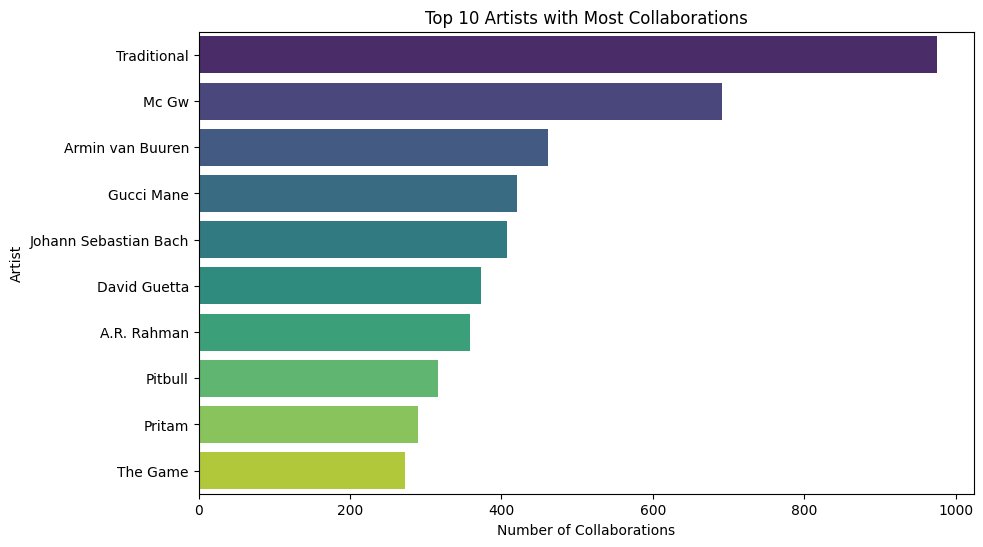

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of collaborations for each artist in artist_0
collaboration_counts = df_eng_art['artist_0'].value_counts()

# Get the top 10 artists with the most collaborations
top_10_artists = collaboration_counts.head(10)

# Plotting the data
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_artists.values, y=top_10_artists.index, palette="viridis")
plt.title('Top 10 Artists with Most Collaborations')
plt.xlabel('Number of Collaborations')
plt.ylabel('Artist')
plt.show()

In [25]:
collaboration_counts = df_eng_art.groupby('artist_0')['artist_1'].nunique()

artists_with_multiple_collaborations = collaboration_counts[collaboration_counts > 1]

# Counting  artists with multiple collaborations
count_of_artists = artists_with_multiple_collaborations.count()

print(f"Number of artists from 'artist_0' attribute who collaborated with more than one unique 'artist_1' attribute records: {count_of_artists}")

Number of artists from 'artist_0' attribute who collaborated with more than one unique 'artist_1' attribute records: 25541
